In [1]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

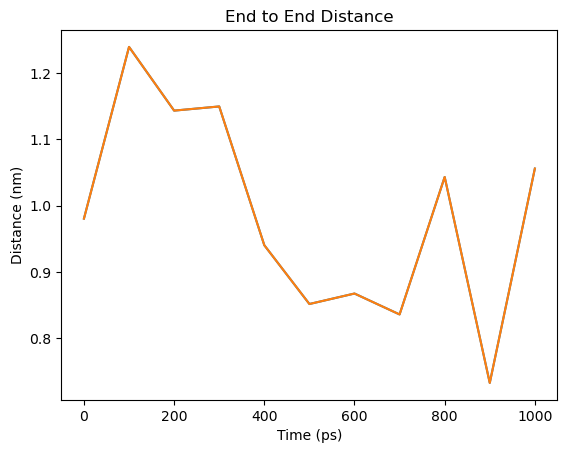

In [2]:
# top file is gromacs/md_center-concat.gro
# trajectory file is gromacs/md_center-concat.xtc
# load the trajectory
traj = md.load_xtc('/home/ess545/comp-lab-class/Week4/Setup/2JOF-Amber/gromacs/md_center-concat.xtc', top='/home/ess545/comp-lab-class/Week4/Setup/2JOF-Amber/gromacs/md_center-concat.gro')


# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

#plot distance vs time
plt.plot(traj.time, dist)

# make this plot look nice
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.title('End to End Distance')
plt.plot(traj.time, dist)

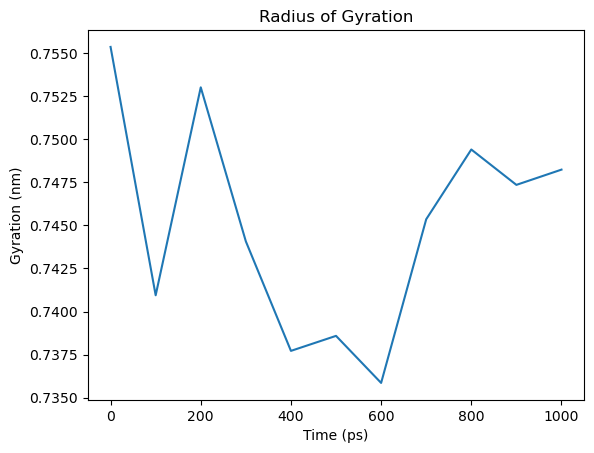

In [3]:
gyr = md.compute_rg(traj)
plt.xlabel('Time (ps)')
plt.ylabel('Gyration (nm)')
plt.title('Radius of Gyration')
plt.plot(traj.time, gyr)

Text(0.5, 0.98, 'Gyration Radius (black) and end-end Distance (green) Versus Time')

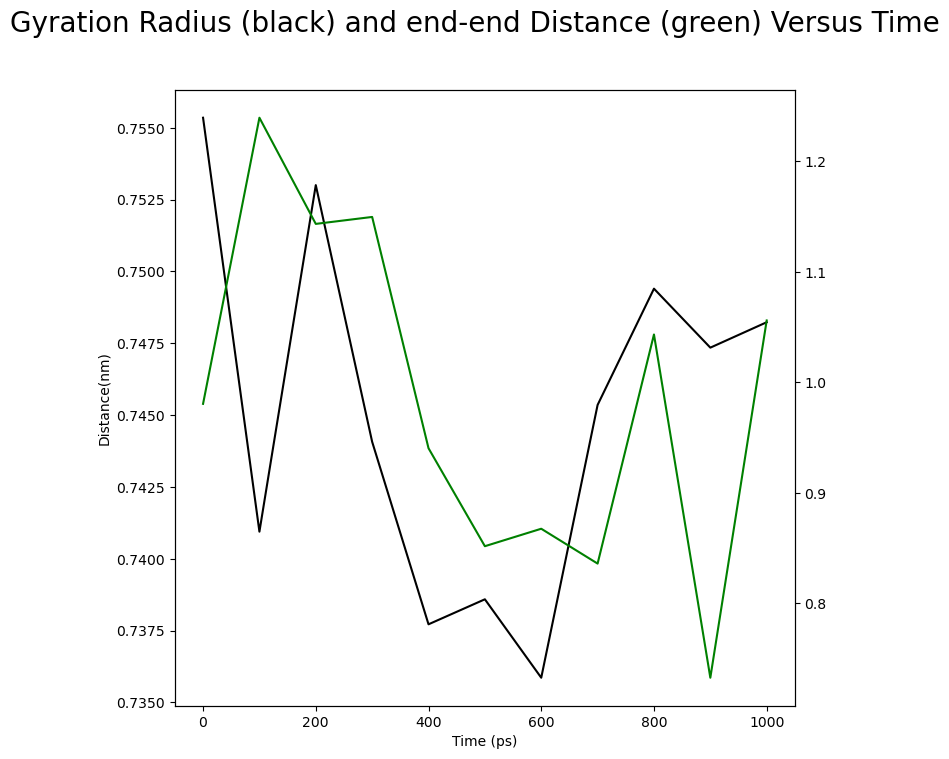

In [4]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(traj.time, gyr, color='k')
ax2.plot(traj.time, dist, color='g')

ax1.set_xlabel("Time (ps)")
ax1.set_ylabel("Distance(nm)")
fig.suptitle("Gyration Radius (black) and end-end Distance (green) Versus Time", fontsize=20)

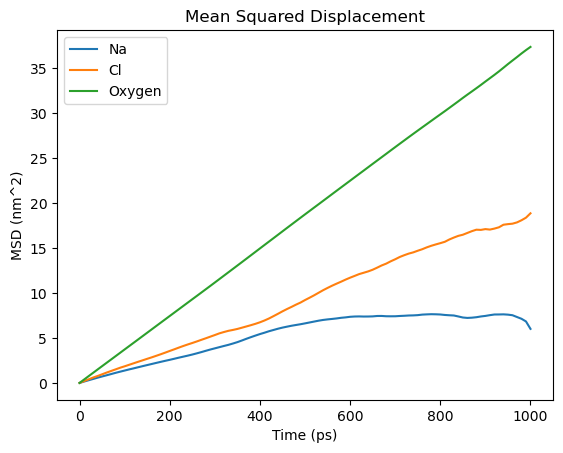

In [5]:
# NaCl in Water
# load .xvg files

os.chdir ("/home/ess545/comp-lab-class/Week4/Setup/Ions-pt-2/gromacs")

traj2 = md.load_xtc('md_center-concat.xtc', top='md_center-concat.gro')

x1, y1 = np.loadtxt('msd_Na.xvg', comments='#', unpack=True)
x2, y2 = np.loadtxt('msd_Cl.xvg', comments='#', unpack=True)
x3, y3 = np.loadtxt('msd_Oxygen.xvg', comments='#', unpack=True)

# plot the data
plt.plot(x1, y1, label='Na')
plt.plot(x2, y2, label='Cl')
plt.plot(x3, y3, label='Oxygen')

#title and labels
plt.title('Mean Squared Displacement')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm^2)')
plt.legend()

#show plot
plt.show()
